In [122]:
# Pandas - Numpy - Seaborn - Matplotlib (import data, manipulation, graphication)
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Scikit-learn (train|test split, scaler)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical 

# TensorFlow - Keras (Model, layers)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

import warnings
warnings.filterwarnings('ignore')

In [189]:
X_train_ae1 = pd.read_csv("X_data_autoencoded1.csv") # Se obtiene el resultado del autoencoder para X_train
X_train_ae1 = X_train_ae1.to_numpy() # Se convierte a un arreglo de numpy

In [190]:
X_test_ae1 = pd.read_csv("X_test_autoencoded1.csv") # Se obtiene el resultado del autoencoder para X_test
X_test_ae1 = X_test_ae1.to_numpy() # Se convierte a un arreglo de numpy

In [191]:
y_train = pd.read_csv("y_train.csv").to_numpy() # Se llama los valores de "y train" asociados a los X en el autoencode.
y_test = pd.read_csv("y_test.csv").to_numpy() # Se llama los valores de "y test" asociados a los X en el autoencode.

In [192]:
def get_model(input_shape): 
    model=Sequential([ # Se construye el modelo Secuencial
                  InputLayer(input_shape=input_shape), # Tamaño del input (100,)
                  Dense(units=500,activation='relu',name='layer_hidden1'), # 500 unidades, activacion 'relu'
                  Dense(units=250,activation='relu',name='layer_hidden2'), # 250 unidades, activacion 'relu'
                  Dense(units=50,activation='relu',name='layer_hidden3'),  # 50 unidades, activacion 'relu'
                  Dense(units=6,activation='softmax',name='output_layer')  # 6 unidades (numero de categorias), activacion 'softmax'
                 ])
    return model

In [193]:
model = get_model(X_train_ae1[0].shape) # Se obtiene el modelo secuencial dado el tamaño de los datos de entrenamiento.

In [194]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_hidden1 (Dense)       (None, 500)               250500    
                                                                 
 layer_hidden2 (Dense)       (None, 250)               125250    
                                                                 
 layer_hidden3 (Dense)       (None, 50)                12550     
                                                                 
 output_layer (Dense)        (None, 6)                 306       
                                                                 
Total params: 388,606
Trainable params: 388,606
Non-trainable params: 0
_________________________________________________________________


In [195]:
def compile_model(model): # Compilador
        model.compile(optimizer='sgd', # se utilizara sgd por ser bueno en clasificaciones.
              loss='categorical_crossentropy', # se utilizara categorical crossentropy por que la variable predictora es un one hot encoding.
              metrics=['accuracy']) # Se observara el accuracy de los datos.

In [196]:
compile_model(model) # compilamos el modelo.

In [197]:
epochs=100
myhistory=model.fit(X_train_ae1,y_train,  epochs=epochs, batch_size=32, validation_split=0.15, verbose=0)

In [198]:
print(myhistory.history['val_accuracy'][-1], "validation set accuracy") # Se imprime el accuracy del modelo respecto al set de validacion
print(myhistory.history['accuracy'][-1], "training set accuracy") # Se imprime el accuracy del modelo respecto al set de entrenamiento

1.0 validation set accuracy
1.0 training set accuracy


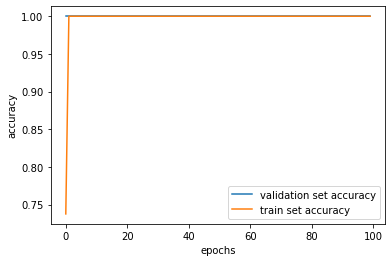

In [199]:
xvals=range(epochs) # Se grafica el accuracy respecto los epochs, vamos que la tendencia indican un buen aprendizaje 
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

In [200]:
loss, accuracy=model.evaluate(X_test_ae1, y_test) 
print(accuracy) # Se evalua el resultado del modelo respecto a los datos de prueba.

2/2 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
1.0


In [201]:
pred = model.predict(X_test_ae1)

2/2 [==============================] - 0s 2ms/step


In [202]:
def results(y_pred,y_test):
    data = pd.read_csv("data_molST.csv")
    target = ['molecules']
    target_values = data[target]['molecules'].unique()
    target_numeric = np.arange(0,len(target_values))
    dic2_target = {target_numeric[i]:target_values[i] for i in range(len(target_numeric)) }

    prediction = [ np.argmax(i) for i in y_pred ]
    test = [ np.argmax(i) for i in y_test]

    res = pd.DataFrame({"Test values":test,"Prediction values":prediction})
    res['Prediction values'] = res['Prediction values'].apply(lambda x: dic2_target[x])
    res['Test values'] = res['Test values'].apply(lambda x: dic2_target[x])

    return res

In [204]:
result = results(pred,y_test)

In [205]:
result.value_counts()

Test values  Prediction values
N2           N2                   19
CH3Cl        CH3Cl                17
dtype: int64

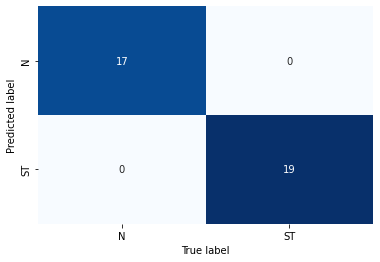

In [207]:
#categorias=['N2', 'CH3Cl', 'H2O', 'H2S', 'CO', 'O3', 'O2', 'CH4', 'HNO3','NO2', 'C2H6', 'N2O', 'NH3', 'CO2']
categorias=["N","ST"]
cf_matrix = confusion_matrix(result["Test values"],result["Prediction values"])
sns.heatmap(cf_matrix,annot=True,cmap='Blues',cbar=False,xticklabels=categorias,yticklabels=categorias)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Sin Autoenconding-enconding - Analisis moleculas

In [ ]:
def get_model(input_shape): 
    model=Sequential([ # Se construye el modelo Secuencial
                  InputLayer(input_shape=input_shape), # Tamaño del input (100,)
                  Dense(units=500,activation='relu',name='layer_hidden1'), # 500 unidades, activacion 'relu'
                  Dense(units=250,activation='relu',name='layer_hidden2'), # 250 unidades, activacion 'relu'
                  Dense(units=50,activation='relu',name='layer_hidden3'),  # 50 unidades, activacion 'relu'
                  Dense(units=2,activation='softmax',name='output_layer')  # 6 unidades (numero de categorias), activacion 'softmax'
                 ])
    return model

In [113]:
data_final_N = pd.read_csv('data_molN.csv', sep=',')
data_final_ST = pd.read_csv('data_molST.csv', sep=',')
data_final_ST.head(10)

,molecules,exoplanet_type,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,N2,ST,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
1,CH3Cl,ST,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
2,H2O,ST,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
3,H2S,ST,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
4,N2,ST,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,...,0.302836,0.302833,0.302830,0.302827,0.302825,0.302823,0.302821,0.302820,0.302819,0.302818
5,CH3Cl,ST,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,...,0.302836,0.302833,0.302830,0.302827,0.302825,0.302823,0.302821,0.302820,0.302819,0.302818
6,H2S,ST,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,...,0.302836,0.302833,0.302830,0.302827,0.302825,0.302823,0.302821,0.302820,0.302819,0.302818
7,CO,ST,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,...,0.302836,0.302833,0.302830,0.302827,0.302825,0.302823,0.302821,0.302820,0.302819,0.302818
8,N2,ST,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,...,0.302849,0.302844,0.302840,0.302837,0.302833,0.302830,0.302828,0.302826,0.302824,0.302823
9,O3,ST,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,0.300090,...,0.302849,0.302844,0.302840,0.302837,0.302833,0.302830,0.302828,0.302826,0.302824,0.302823


In [81]:
data_final = pd.concat([data_final_N, data_final_ST])

In [109]:
target = ['molecules'] # Seleccionamos la columna predictora
#predictors = data.columns.values.tolist()[2:] #
target_values = data_final[target]['molecules'].unique() # Seleccionamos las categorias que puede tener cada asteroide, son 23 en total.
target_numeric = np.arange(0,len(target_values)) # Se crea una lista de numeros enteros entre 0 y 23
dic_target = {target_values[i]:target_numeric[i] for i in range(len(target_numeric)) }

In [110]:
print(dic_target)

{'H2': 0, 'He': 1, 'H2O': 2, 'CH4': 3, 'Kr': 4, 'Ne': 5, 'C2H6': 6, 'Ar': 7, 'Xe': 8, 'N2': 9, 'CH3Cl': 10, 'H2S': 11, 'CO': 12, 'O3': 13, 'O2': 14, 'HNO3': 15, 'NO2': 16, 'N2O': 17, 'NH3': 18, 'CO2': 19}


In [111]:
data_final.insert(0,"type_numeric",data_final["molecules"].apply(lambda x: dic_target[x]) ) # Se crea una nueva columna de categorias pero numericas.
data_final.drop(["exoplanet_type"],axis=1,inplace=True) # Se deja solamente la columna categorica numerica (al final)
data_final.drop(["molecules"],axis=1,inplace=True) # Se deja solamente la columna categorica numerica (al final)
data_final.head()

,type_numeric,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,0.33654594260052484,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,0,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,0.158027,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
1,1,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,0.158027,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
2,2,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,0.158027,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
3,3,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,0.158027,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
4,0,0.154927,0.154558,0.154194,0.153836,0.153484,0.153139,0.152800,0.152467,0.152140,...,0.212166,0.212132,0.212102,0.212075,0.212050,0.212029,0.212011,0.211996,0.211984,0.211976


In [156]:
H2O_present = data_final[data_final.type_numeric == 3]
H2O_present['H2O'] = 1
H2O_no_present = data_final[data_final.type_numeric != 3][:109]
H2O_no_present['H2O'] = 0
H2O_no_present.shape, H2O_present.shape

((109, 3002), (93, 3002))

In [157]:
X_data_H2O = pd.concat([H2O_no_present[H2O_no_present.columns[2:-2]], H2O_present[H2O_present.columns[2:-2]]])
y_data_H2O = pd.concat([H2O_no_present[H2O_no_present.columns[-1]], H2O_present[H2O_present.columns[-1]]])

In [159]:
y_one_hot = to_categorical(y_data_H2O, num_classes=2)
pd.DataFrame(y_one_hot).to_csv("y_data.csv",index=False)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_data_H2O, y_one_hot, test_size=0.2, random_state=500) # Realizamos un split de los datos a entrenamiento y prueba. Random state = 27
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(161, 2998)
(161, 2)
(41, 2998)
(41, 2)


In [161]:
scaler = StandardScaler() # Se construye una funcion para escalar los datos predictores "X" tanto para training como testing utilizando un Standard Scaler.
X_train_scaled = scaler.fit_transform(X_train) # valor escalado de X_train
X_test_scaled = scaler.fit_transform(X_test) # valor escalado de X_test

0.7200000286102295 validation set accuracy
0.6911764740943909 training set accuracy


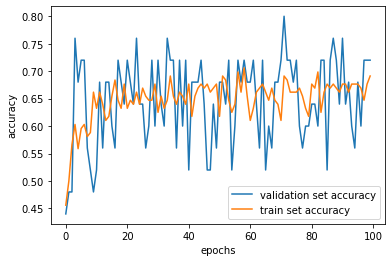

In [162]:
model = get_model(X_train_scaled[0].shape)
compile_model(model)
myhistory=model.fit(X_train_scaled,y_train,  epochs=100, batch_size=32, validation_split=0.15, verbose=0)
print(myhistory.history['val_accuracy'][-1], "validation set accuracy") # Se imprime el accuracy del modelo respecto al set de validacion
print(myhistory.history['accuracy'][-1], "training set accuracy") # Se imprime el accuracy del modelo respecto al set de entrenamiento

xvals=range(100) # Se grafica el accuracy respecto los epochs, vamos que la tendencia indican un buen aprendizaje 
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

In [163]:
loss, accuracy=model.evaluate(X_test_scaled, y_test) 
print(accuracy) # Se evalua el resultado del modelo respecto a los datos de prueba.

2/2 [==============================] - 0s 10ms/step - loss: 0.5587 - accuracy: 0.7073
0.707317054271698


In [166]:
pred = model.predict(X_test_scaled) # Se predice los datos respecto a los datos de prueba
result = results(pred,y_test)

2/2 [==============================] - 0s 11ms/step


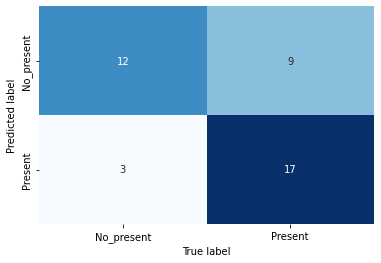

In [165]:
categorias=["No_present","Present"]
cf_matrix = confusion_matrix(result["Test values"],result["Prediction values"])
sns.heatmap(cf_matrix,annot=True,cmap='Blues',cbar=False,xticklabels=categorias,yticklabels=categorias)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()